# How can we add audio to the Gradio app?

We would like the ability to not only show people words and phrases in text, but also have it show how to pronounce the words.

## Step 1: We need audio

These computers should have an audio recording application called `Sound Recorder`.  
Use this application to create short audio files with the words that you are using in your app.
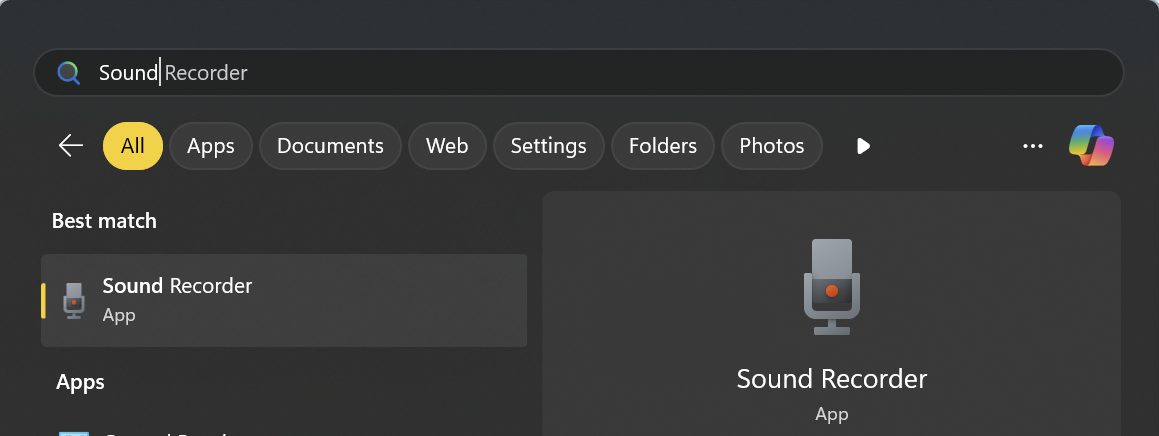

1. After recording the audio, rename the files to be the appropriate terms.
1. Create a folder called `audio_files` in our application folder
    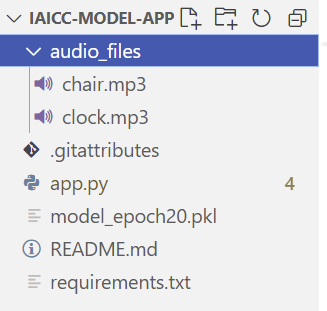
1. Drag/copy our audio files in the `audio_files` folder

## Step 2: Modifying the dictionary

We will want to modify the dictionary to now reference our new audio files.

We are adding a new element for each category called 'audio'.

```
name_map = {
    "Chair": {
        "lang": "Oakanke", 
        "phrases": "description", 
        "audio": "audio_files/chair.mp3"
        },
    "Clock": {"lang": "Mazaskanskan", "phrases": "description", "audio": "audio_files/clock.mp3"},
    "Light": {"lang": "Hupȟéstola", "phrases": "description", "audio": "audio_files/light.mp3"},
    # Add other categories similarly...
}
```

## Step 3: Modifying the Gradio.Block user interface

1. Add the the sound variable that will refer to an audio block  
`sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)`

1. Modify the classify_btn click event to use the sound as an output.  
`classify_btn.click(fn=classify_and_display, inputs=image, outputs=[label, additional_info, sound])`

In [ ]:
with gr.Blocks(theme=theme) as demo:
    gr.Markdown("# My Object Recognition Demo")
    with gr.Row():
        with gr.Column():
            image = gr.Image()
            classify_btn = gr.Button("Classify")
        with gr.Column():
            additional_info = gr.Textbox(label="Additional Information", lines=5, interactive=False)
            sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)
    with gr.Row():
        label = gr.Label()

    classify_btn.click(fn=classify_and_display, inputs=image, outputs=[label, additional_info, sound])

demo.launch(inline=False)

## Step 4: Modifying classify_and_display function

1. Store the audio file path in a variable called `audio_file`.  
    `additional_info, audio_file = get_additional_info(predicted_result)`

2. Return that `audio_file` variable.  
    `return result["probabilities"], additional_info, audio_file`


In [ ]:
def classify_and_display(img):
    result = classify_image(img)
    predicted_result = result["predicted_category"]
    additional_info, audio_file = get_additional_info(predicted_result)
    return result["probabilities"], additional_info, audio_file

## Step 5: Modifying get_additional_info function

1. Return the `audio` element for the predicted category as a second variable in the return.  
`return (f"Lakota: {info['lang']}\nPhrases: {info['phrases']}\n", info['audio'])`

In [ ]:
def get_additional_info(predicted_category):
    if predicted_category in name_map.keys():
        info = name_map[predicted_category]
        return (f"Lakota: {info['lang']}\nPhrases: {info['phrases']}\n", info['audio'])
    else:
        return ("No additional information available.", None)